# Shapes!
Visualizes different discretized curves:
- Hasimoto soliton
- Kelvin ring
- Normal ring
- Perturbed ring

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

## Curve Initializers

In [38]:
class CurveInitializer(ABC):
    """Base class for curve initialization."""
    
    @abstractmethod
    def initialize(self):
        """Return initial curve as (N, 3) numpy array."""
        pass
    
    @property
    @abstractmethod
    def name(self):
        """Return name of curve."""
        pass

In [39]:
class HasimotoSoliton(CurveInitializer):
    """Hasimoto soliton curve."""
    
    def __init__(self, s_min=-200, s_max=200, num_points=3000, nu=1.0, tau_0=0.5, t=0):
        self.s_min = s_min
        self.s_max = s_max
        self.num_points = num_points
        self.nu = nu
        self.tau_0 = tau_0
        self.t = t
    
    def initialize(self):
        s = np.linspace(self.s_min, self.s_max, self.num_points)
        
        eta = self.nu * (s - 2 * self.tau_0 * self.t)
        mu = 1 / (1 + self.tau_0**2)
        gamma_amp = (2 * mu * (1 / np.cosh(eta))) / self.nu
        theta = self.tau_0 * s + (self.nu**2 - self.tau_0**2) * self.t
        
        x = s - (2 * mu / self.nu) * np.tanh(eta)
        y = gamma_amp * np.cos(theta)
        z = gamma_amp * np.sin(theta)
        
        return np.stack((x, y, z), axis=1)
    
    @property
    def name(self):
        return "Hasimoto Soliton"

In [40]:
class KelvinRing(CurveInitializer):
    """Kelvin ring curve."""
    
    def __init__(self, R=1.0, A=0.01, N=10, num_points=500):
        self.R = R
        self.A = A
        self.N = N
        self.num_points = num_points
    
    def initialize(self):
        s = np.linspace(0, 2 * np.pi, self.num_points)
        
        x = self.R * np.cos(s) + self.A * np.cos(self.N * s) * np.cos(s)
        y = self.R * np.sin(s) + self.A * np.cos(self.N * s) * np.sin(s)
        z = -self.A * np.sin(self.N * s)
        
        return np.stack((x, y, z), axis=1)
    
    @property
    def name(self):
        return "Kelvin Ring"

In [41]:
class NormalRing(CurveInitializer):
    """Simple circular ring."""
    
    def __init__(self, R=1.0, num_points=100):
        self.R = R
        self.num_points = num_points
    
    def initialize(self):
        theta = np.linspace(0, 2 * np.pi, self.num_points)
        x = self.R * np.cos(theta)
        y = self.R * np.sin(theta)
        z = np.zeros_like(theta)
        
        return np.stack((x, y, z), axis=1)
    
    @property
    def name(self):
        return "Normal Ring"

In [42]:
class PerturbedRing(CurveInitializer):
    """Circular ring with sech perturbation in z-direction."""
    
    def __init__(self, num_points=300, strength=10.0, amplitude=1/3):
        self.num_points = num_points
        self.strength = strength  # parameter in sech(strength * s)
        self.amplitude = amplitude  # amplitude of z perturbation
    
    def initialize(self):
        s = np.linspace(-np.pi, np.pi, self.num_points)
        
        x = np.cos(s)
        y = np.sin(s)
        z = self.amplitude / np.cosh(self.strength * s)  # sech(x) = 1/cosh(x)
        
        return np.stack((x, y, z), axis=1)
    
    @property
    def name(self):
        return "Perturbed Ring"

## Plotting

In [43]:
def plot_curve(initializer):
    """
    Visualize a discretized curve.
    
    Args:
        initializer: CurveInitializer instance
    """
    curve = initializer.initialize()
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(curve[:, 0], curve[:, 1], curve[:, 2], linewidth=2)
    ax.scatter(curve[:, 0], curve[:, 1], curve[:, 2], s=5, alpha=0.5)
    
    ax.set_title(f'{initializer.name}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.tight_layout()
    plt.show()
    
    return fig, ax

## Visualizations

### Hasimoto Soliton

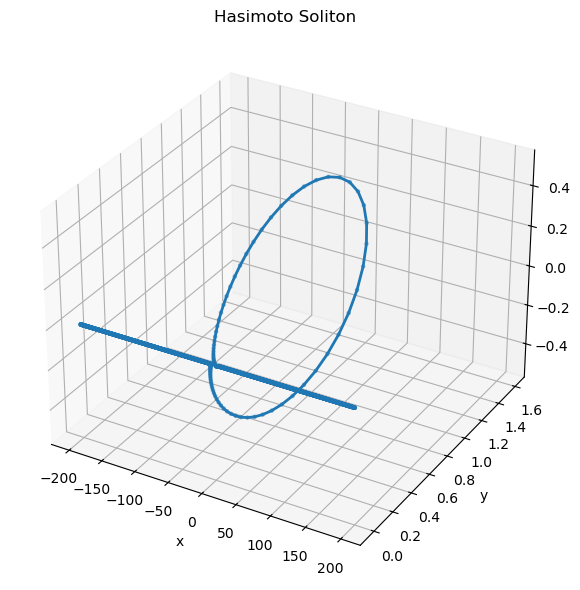

In [44]:
soliton = HasimotoSoliton()
soliton_fig, soliton_ax = plot_curve(soliton)

### Kelvin Ring

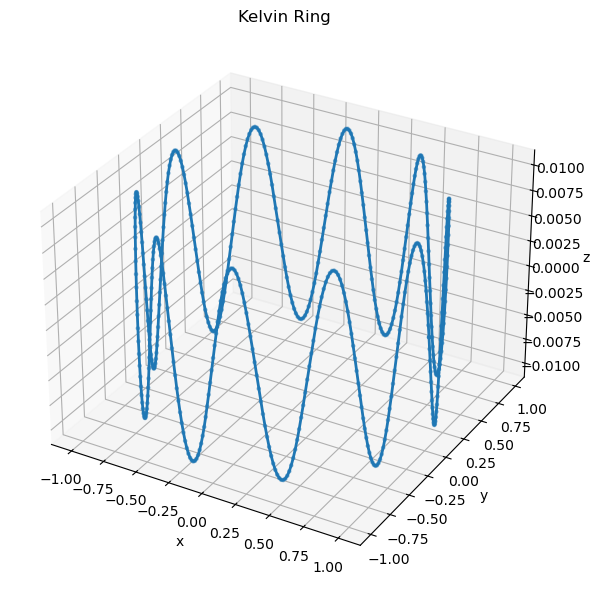

In [45]:
kelvin = KelvinRing()
kelvin_fig, kelvin_ax = plot_curve(kelvin)

### Normal Ring

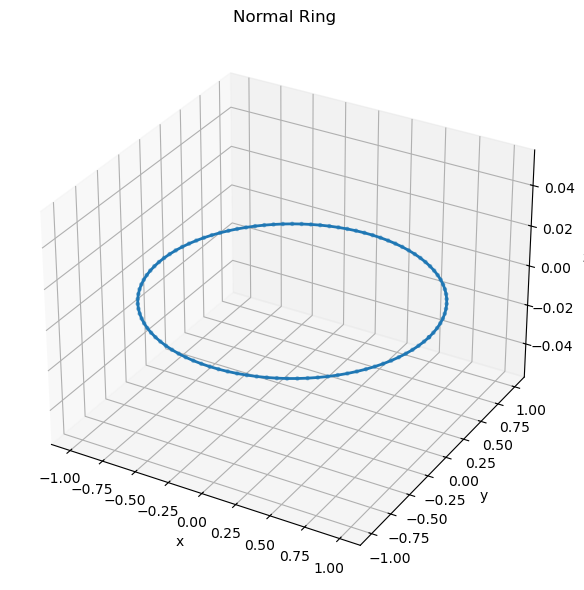

In [46]:
ring = NormalRing()
ring_fig, ring_ax = plot_curve(ring)

### Perturbed Ring

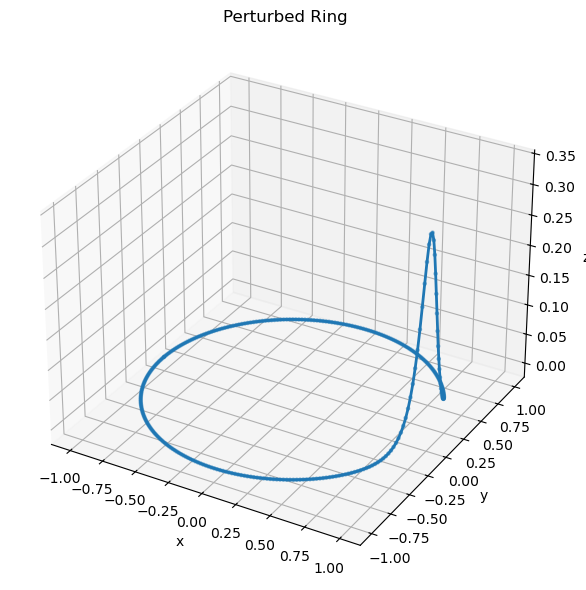

In [47]:
perturbed = PerturbedRing()
perturbed_fig, perturbed_ax = plot_curve(perturbed)